### Read Data

In [1]:
import numpy as np
import sklearn.datasets
import lib
import matplotlib.pyplot as plt

# A function that reads all float numbers from a file
# and returns a 2D array
def read_nums_from_file_per_line(f):
    f = open(f, "r")
    lines = f.readlines()
    res = []    
    for l in lines:
        l = l.split()
        for i in range(len(l)):
            l[i] = float(l[i])
        res.append(l)
    f.close
    return res

# Returns the characteristics and labels of a dataset as numpy.arrays
def extract_characteristics_labels_to_NumpyArrays(Data_Table, labels_index):
    D = np.array(Data_Table)
    y = D[:, labels_index]
    X = D[:,1:]
    return (X, y)

# Read the datasets for training and testing
Data_train = read_nums_from_file_per_line("./pr_lab1_2020-21_data/train.txt")
(X_train, y_train) = extract_characteristics_labels_to_NumpyArrays(Data_train, 0)
[n_samples_train, n_features] = X_train.shape

Data_test = read_nums_from_file_per_line("./pr_lab1_2020-21_data/test.txt")
(X_test, y_test) = extract_characteristics_labels_to_NumpyArrays(Data_test, 0)
[n_samples_test, n_features] = X_test.shape


# Present some results
print("DATA OVERVIEW")
print("------------------------------------------")
print("Train:")
print("X_train shape: (n_samples) {} x (n_features) {}".format(X_train.shape[0], X_train.shape[1]))
print("y_train shape: (n_samples) {}".format(y_train.shape[0]))

print("Test:")
print("X_test shape: (n_samples) {} x (n_features) {}".format(X_test.shape[0], X_test.shape[1]))
print("y_test shape: (n_samples) {}".format(y_test.shape[0]))

# set converts a list into a set containing the unique elements in the list
print("Unique labels: {}".format(set(y_train)))

print("------------------------------------------")
print("Features:")
print("Grayscale values of 16 x 16 pixels of the image of the digit")

DATA OVERVIEW
------------------------------------------
Train:
X_train shape: (n_samples) 7291 x (n_features) 256
y_train shape: (n_samples) 7291
Test:
X_test shape: (n_samples) 2007 x (n_features) 256
y_test shape: (n_samples) 2007
Unique labels: set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
------------------------------------------
Features:
Grayscale values of 16 x 16 pixels of the image of the digit


### Sketch Some Data

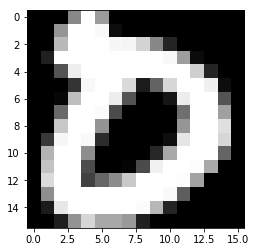

In [2]:
indexToSketch = 130
# sketch_index_from_dataset(X_train, indexToSketch)
lib.show_sample(X_train, indexToSketch)

### Sketch a random sample of every different label (0-9)

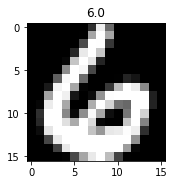

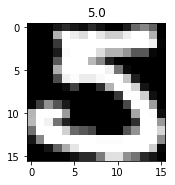

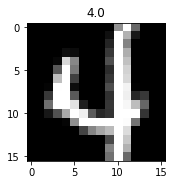

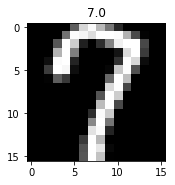

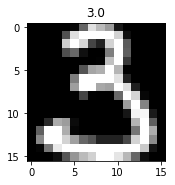

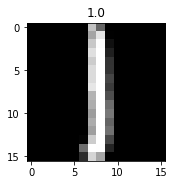

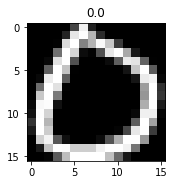

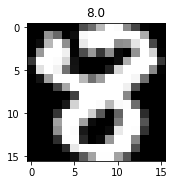

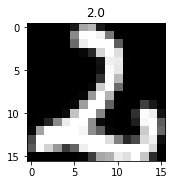

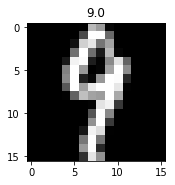

In [3]:
lib.plot_digits_samples(X_train, y_train)

### Find the mean of the values of one pixel for a label

In [4]:
X_pixel = 10
Y_pixel = 10
number_to_find = 0
mean_of_zero = lib.digit_mean_at_pixel(X_train, y_train, number_to_find, (X_pixel, Y_pixel))
print ("the mean of the pixel (", X_pixel, ",", Y_pixel, ") is", mean_of_zero)

('the mean of the pixel (', 10, ',', 10, ') is', -0.5041884422110553)


### Find the variance of the values of one pixel for a label

In [5]:
X_pixel = 10
Y_pixel = 10
number_to_find = 0
variance_of_zero = lib.digit_variance_at_pixel(X_train, y_train, number_to_find, (X_pixel, Y_pixel))
print ("the variance of the pixel (", X_pixel, ",", Y_pixel, ") is",variance_of_zero)

('the variance of the pixel (', 10, ',', 10, ') is', 0.5245221428814929)


### Find mean and variance of every characteristic of a label

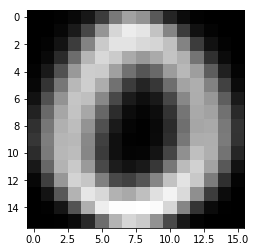

In [6]:
number_to_find = 0
mean_digit = lib.digit_mean(X_train, y_train, number_to_find)
mean_digit = np.reshape(mean_digit, [16,16])
plt.imshow(mean_digit, cmap='gray')

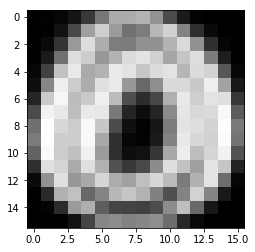

In [7]:
number_to_find = 0
variance_digit = lib.digit_variance(X_train, y_train, number_to_find)
variance_digit = np.reshape(variance_digit, [16,16])
plt.imshow(variance_digit, cmap='gray')

### Find the mean and variance of all digits

In [8]:
means = []
variances = []
for i in range(10):
    # run the find mean of a digit for all digits
    var1 = lib.digit_mean(X_train, y_train, i)
    means.append(var1)
    # run the find variance of a digit for all digits
    var2 = lib.digit_variance(X_train, y_train, i)
    variances.append(var2)

### Plot every digit using the means of the characteristics of all its appearaences

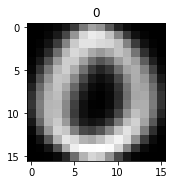

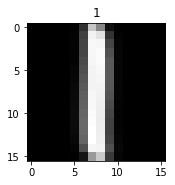

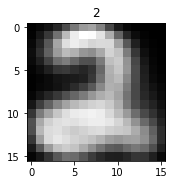

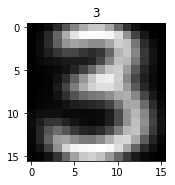

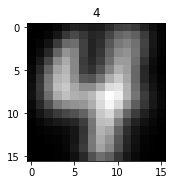

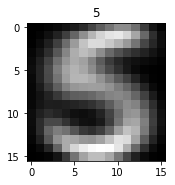

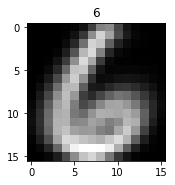

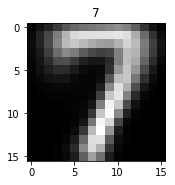

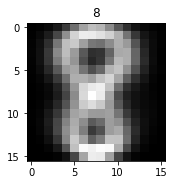

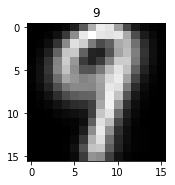

In [9]:
for i in range(10): #run for every digit 
    fig = plt.figure()
    fig.add_subplot(10, 1, i + 1)
    fig.set_figheight(30)
    fig.set_figwidth(30)
    plt.title(i)
    plt.imshow(np.reshape(means[i], [16,16]), cmap='gray') #plot image according to the means of pixels of every digit

### Euclidean Distance Classifier

### Classify 101st test data using euclidean distance

('The 101th digit is recognized as', 0.0)
('The 101th digit is', 0.0)


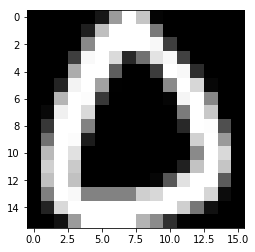

In [10]:
index_to_classify = 100
classified_array = lib.euclidean_distance_classifier(X_test, means)
print ("The 101th digit is recognized as", float(classified_array[index_to_classify]))
print ("The 101th digit is", y_test[index_to_classify])
lib.show_sample(X_test, index_to_classify)

### Classify our test data

In [11]:
# Classify test data
test_predictions = lib.euclidean_distance_classifier(X_test, means)

In [12]:
from sklearn.metrics import zero_one_loss
#we use the zero_one_less function to calculate the test error => so we find the success rate
print ("The success rate of our predictions is", (1-zero_one_loss(y_test, test_predictions))*100, "%")

('The success rate of our predictions is', 81.41504733432984, '%')


### The Euclidean Distance Classifier

In [13]:
# We create an instance of our Euclidean Distance Classifier
c = lib.EuclideanDistanceClassifier()
# We fit it in our model
c.fit(X_train, y_train)
# Give it the test Dataset to predict
pr = c.predict(X_test)
# and print the success rate
p = c.score(X_test, y_test)
print("The success rate of our classifier's predictions is", p * 100, "%")

("The success rate of our classifier's predictions is", 81.41504733432984, '%')


### 5-Fold Cross Validation

In [14]:
X_all = np.append(X_train,X_test,0)
y_all = np.append(y_train,y_test,0)
scores = lib.evaluate_classifier(lib.EuclideanDistanceClassifier(), X_all, y_all, 5)
print ("the score of the euclidean classifier with use of 5-fold-cross-validation is", scores*100, "%")

('the score of the euclidean classifier with use of 5-fold-cross-validation is', 84.07163638677287, '%')


### Decision Regions

In [15]:
def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    
    # Predict a dense mesh of values of the two features
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the predictions of the mesh
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    
    # Scatter the features of X labeling them in the correct way
    for cl in set(y):
        ax.scatter(
            X0[y == cl], X1[y == cl],
            cmap=plt.cm.coolwarm, label=cl,
            s=60, alpha=0.9, edgecolors='k')
    
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[0])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(2)
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

clf = lib.EuclideanDistanceClassifier()
# We fit our classifier to the new dataset in less dimensions
clf.fit(pca_train, y_train)
# The score is much less due to information loss
p = clf.score(pca_test, y_test)
print("The success rate of our classifier's predictions is", p * 100, "%")

("The success rate of our classifier's predictions is", 51.619332336821124, '%')


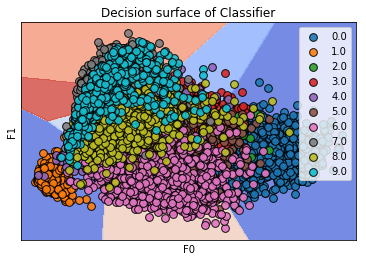

In [17]:
# Plot the Decision Regions and the places of the testing dataset
# using the same colors for labels and regions
plot_clf(clf, pca_train, y_train, ["F0", "F1"])

### Learning Curve

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

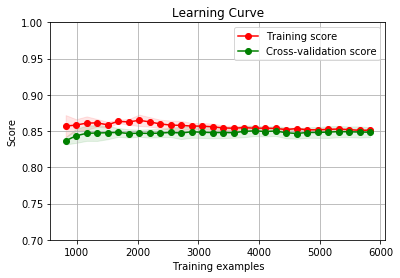

In [19]:
# we use the function learning_curve to plot the learning curve 
train_sizes, train_scores, test_scores = learning_curve( lib.EuclideanDistanceClassifier(), X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(.14, 1.0, 30))
plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.7, 1))
plt.show()

### Calculate Priors

In [20]:
# We calculate the a-priori probabilities of every class
priors = lib.calculate_priors(X_train, y_train)
print("Class | a-priori probability")
print("----------------------------")
for i in range(len(priors)):
    print("{}     | {}".format(i, priors[i]))

Class | a-priori probability
----------------------------
0     | 0.163763544095
1     | 0.13784117405
2     | 0.100260595254
3     | 0.0902482512687
4     | 0.0894253188863
5     | 0.0762584007681
6     | 0.0910711836511
7     | 0.0884652311068
8     | 0.0743382252092
9     | 0.0883280757098


### Naive Bayesian Classifier

In [21]:
# Using our implementation
custom = lib.CustomNBClassifier()
custom.fit(X_train, y_train)
# predictions = cl.predict(X_test)
p = custom.score(X_test, y_test)
print("The success rate of our NB classifier's predictions is", p * 100, "%")

("The success rate of our NB classifier's predictions is", 71.5495764823119, '%')


In [22]:
custom_score = lib.evaluate_custom_nb_classifier(X_all, y_all)
print("The success rate of our NB classifier's predictions is", custom_score, "%")

("The success rate of our NB classifier's predictions is", 73.17671658366447, '%')


In [23]:
import sklearn.naive_bayes as sk

# We can compare it to the scikit learn implementation
nb = sk.GaussianNB()
nb.fit(X_train, y_train)

print("The success rate of the library's NB classifier's predictions is", nb.score(X_test, y_test) * 100, "%") 

("The success rate of the library's NB classifier's predictions is", 71.94818136522171, '%')


In [24]:
nb_score = lib.evaluate_sklearn_nb_classifier(X_all, y_all)
print("The success rate of the library's NB classifier's predictions is", nb_score, "%")

("The success rate of the library's NB classifier's predictions is", 73.76829952512335, '%')


### variance = 1

In [25]:
# Using our implementation
cust1 = lib.CustomNBClassifier(use_unit_variance=True)
cust1.fit(X_train, y_train)
# predictions = cl.predict(X_test)
p = cust1.score(X_test, y_test)
print("The success rate of our NB classifier's predictions with variance=1 everywhere is", p * 100, "%")

("The success rate of our NB classifier's predictions with variance=1 everywhere is", 81.26557050323866, '%')


### Nearest Neighbors

In [26]:
(s1,s2,s3,s4,s5) = lib.evaluate_knn_classifier(X_all, y_all)
print("The success rate of the K-Nearest Neighbors classifier's predictions with 1 neighbors is", s1, "%")
print("The success rate of the K-Nearest Neighbors classifier's predictions with 3 neighbors is", s2, "%")
print("The success rate of the K-Nearest Neighbors classifier's predictions with 5 neighbors is", s3, "%")
print("The success rate of the K-Nearest Neighbors classifier's predictions with 7 neighbors is", s4, "%")
print("The success rate of the K-Nearest Neighbors classifier's predictions with 9 neighbors is", s5, "%")

("The success rate of the K-Nearest Neighbors classifier's predictions with 1 neighbors is", 96.38620023483547, '%')
("The success rate of the K-Nearest Neighbors classifier's predictions with 3 neighbors is", 96.12807787745751, '%')
("The success rate of the K-Nearest Neighbors classifier's predictions with 5 neighbors is", 95.95601173020528, '%')
("The success rate of the K-Nearest Neighbors classifier's predictions with 7 neighbors is", 95.54732860191916, '%')
("The success rate of the K-Nearest Neighbors classifier's predictions with 9 neighbors is", 95.3859920063394, '%')


### Support Vector Machine

In [27]:
slinear = lib.evaluate_linear_svm_classifier(X_all, y_all)
srbf = lib.evaluate_rbf_svm_classifier(X_all, y_all)

print("The success rate of the SVM classifier's predictions with kernel = linear is", slinear, "%")
print("The success rate of the SVM classifier's predictions with kernel = rbf is", srbf, "%")

/home/gmagaf/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


("The success rate of the SVM classifier's predictions with kernel = linear is", 94.68683591016097, '%')
("The success rate of the SVM classifier's predictions with kernel = rbf is", 96.69800505532515, '%')


### Voting Classifier

In [28]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#we need firstly to see where every classifier is better
#so we create all the estimators
#and we see some metrics about the results of them


prediction_nb = nb.predict(X_test)
n1 = KNeighborsClassifier(n_neighbors = 1)
n1.fit(X_train, y_train)
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(X_train, y_train)
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(X_train, y_train)
n7 = KNeighborsClassifier(n_neighbors = 7)
n7.fit(X_train, y_train)
n9 = KNeighborsClassifier(n_neighbors = 9)
n9.fit(X_train, y_train)
prediction_n1 = n1.predict(X_test)
prediction_n3 = n3.predict(X_test)
prediction_n5 = n5.predict(X_test)
prediction_n7 = n7.predict(X_test)
prediction_n9 = n9.predict(X_test)
cl_linear = SVC(kernel = 'linear')
cl_linear.fit(X_train, y_train)
cl_rbf = SVC(kernel = 'rbf')
cl_rbf.fit(X_train, y_train)
prediction_svmlinear = cl_linear.predict(X_test)
prediction_svmrbf = cl_rbf.predict(X_test)

In [29]:
i = 0
target_names = []
for j in range(len(y_test)):
    if (y_test[j] not in target_names):
        target_names.append(y_test[j])
        i =i+1
    if (i==10):
        break

target_names = [str(x) for x in target_names]
print ("for Gaussian Naive Bayes :")
print(classification_report(y_test, prediction_nb, target_names=target_names))
print ("for KNN with 1 neighbors :")
print(classification_report(y_test, prediction_n1, target_names=target_names))
print ("for KNN with 3 neighbors :")
print(classification_report(y_test, prediction_n3, target_names=target_names))
print ("for KNN with 5 neighbors :")
print(classification_report(y_test, prediction_n5, target_names=target_names))
print ("for KNN with 7 neighbors :")
print(classification_report(y_test, prediction_n7, target_names=target_names))
print ("for KNN with 9 neighbors :")
print(classification_report(y_test, prediction_n9, target_names=target_names))
print ("for SVM with kernel = linear :")
print(classification_report(y_test, prediction_svmlinear, target_names=target_names))
print ("for SVM with kernel = rbf :")
print(classification_report(y_test, prediction_svmrbf, target_names=target_names))

for Gaussian Naive Bayes :
              precision    recall  f1-score   support

         9.0       0.93      0.82      0.87       359
         6.0       0.91      0.96      0.94       264
         3.0       0.78      0.71      0.74       198
         0.0       0.92      0.47      0.62       166
         2.0       0.76      0.28      0.41       200
         4.0       0.80      0.46      0.59       160
         1.0       0.66      0.89      0.76       170
         8.0       0.85      0.90      0.87       147
         7.0       0.43      0.66      0.52       166
         5.0       0.45      0.86      0.59       177

   micro avg       0.72      0.72      0.72      2007
   macro avg       0.75      0.70      0.69      2007
weighted avg       0.77      0.72      0.72      2007

for KNN with 1 neighbors :
              precision    recall  f1-score   support

         9.0       0.96      0.99      0.97       359
         6.0       0.98      0.97      0.97       264
         3.0       0.94 

so comparing the results we can choose the 3 estimators : 
GNB,
3NN,
SVM with kernel=RBF


In [30]:
p = lib.evaluate_voting_classifier(X_all, y_all)
print("The success rate of the voting classifier's predictions (hard voting) is", p[0]*100, "%")
print("The success rate of the voting classifier's predictions (soft voting) is", p[1]*100, "%")

("The success rate of the voting classifier's predictions (hard voting) is", 96.08500349939555, '%')
("The success rate of the voting classifier's predictions (soft voting) is", 95.9129373521433, '%')


In [31]:
p = lib.evaluate_bagging_classifier(X_all, y_all)
print("The success rate of the voting classifier's predictions (hard voting) is", p*100, "%")

("The success rate of the voting classifier's predictions (hard voting) is", 96.71952199991901, '%')
